# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID", how="outer")


# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_number =merged_df["Mouse ID"].nunique()
mice_number

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df =merged_df.loc[merged_df["Mouse ID"] == "g989", :]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"] !="g989", :]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_num_clean = clean_df["Mouse ID"].nunique()
mice_num_clean


248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen_df = clean_df.groupby(["Drug Regimen"])
grouped_regimen_df.head()

mean_group = grouped_regimen_df["Tumor Volume (mm3)"].mean()
median_group =grouped_regimen_df["Tumor Volume (mm3)"].median()
variance_group=grouped_regimen_df["Tumor Volume (mm3)"].var()
standard_dev_group=grouped_regimen_df["Tumor Volume (mm3)"].std()
sem_group=grouped_regimen_df["Tumor Volume (mm3)"].sem()

#Create a dataframe with the above calculated data
summary_df=pd.DataFrame({"Tumor Volume (mm3)Mean":mean_group, 
                         "Tumor Volume (mm3)Median":median_group, 
                         "Tumor Volume (mm3)VAR":variance_group, 
                         "Tumor Volume (mm3)STD":standard_dev_group,
                         "Tumor Volume (mm3)SEM":sem_group})
#Displaying the dataframe
summary_df     

,Tumor Volume (mm3)Mean,Tumor Volume (mm3)Median,Tumor Volume (mm3)VAR,Tumor Volume (mm3)STD,Tumor Volume (mm3)SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

grouped_regimen_df = clean_df.groupby(["Drug Regimen"])

summary_two_df = grouped_regimen_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_two_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

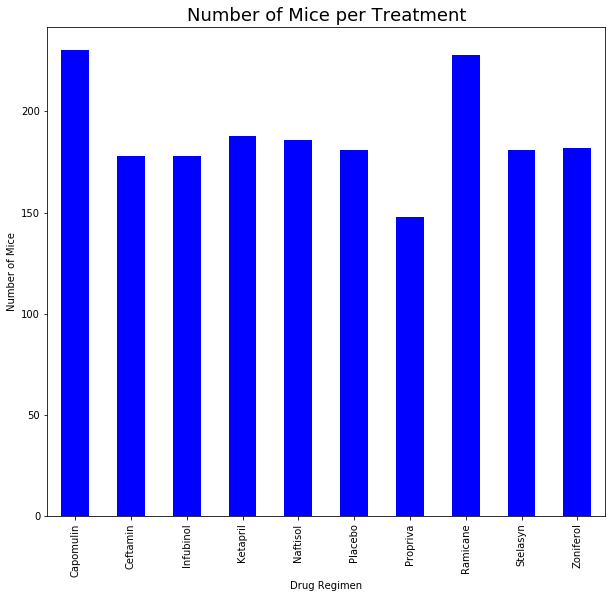

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = grouped_regimen_df["Mouse ID"].count()
#fig size
fig, ax= plt.subplots(figsize=(10,9))
#barplot using Pandas
count.plot(kind="bar",color="b")

#add the chart title and lables
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment", fontsize=18)

plt.show()

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count = grouped_regimen_df["Mouse ID"].count()
#Generate x_axis
x_axis= count.index.values
x_axis

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [14]:
#generate y_axis
y_axis= count.values
y_axis

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

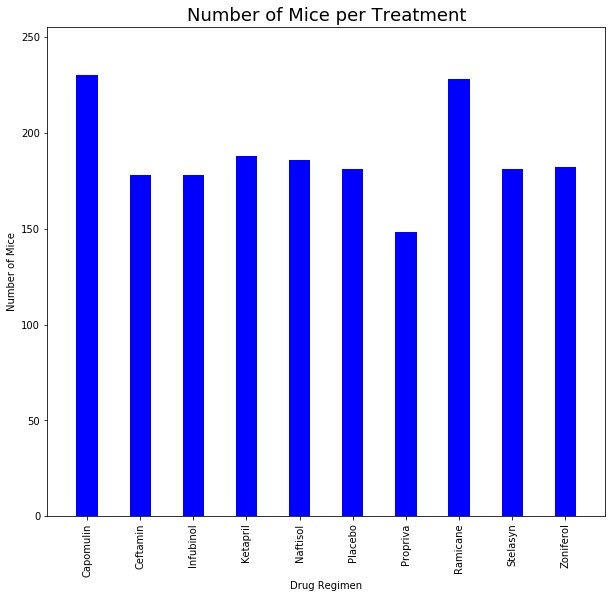

In [15]:
#figure size
fig, ax = plt.subplots(figsize=(10,9))

#Barplot using pyplot
plt.bar(x_axis, y_axis, color="b", width=0.4, alpha=1, align="center")

#Set the limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+25)

#Give chart title and labels
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment", fontsize=18)

#Display the chart
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

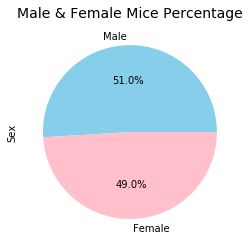

In [17]:
labels = clean_df['Sex']
colors = ["skyblue", "pink"]

#Pieplot using pandas
gender_data.plot(kind="pie", colors = colors, autopct='%1.1f%%')

#Give the title
plt.title("Male & Female Mice Percentage", fontsize =14)


#Display the pie chart
plt.show()

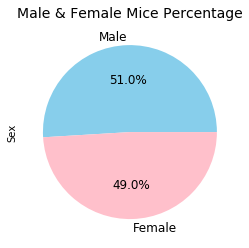

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label=["Female", " Male"]
colors = ["skyblue", "pink"]

#Pieplot using pandas
gender_data.plot.pie(y='Total Count', colors = colors, autopct="%1.1f%%", fontsize =12)

#Set the labels
plt.title('Male & Female Mice Percentage', fontsize=14)
plt.ylabel('Sex')

#Display the figure
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds


In [21]:
#Creating dataframes specific to regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :] 

In [22]:
# For Capomulin
#Grouping the dataframe "capomulin_df" by Mouse Id and then getting the maximum values from all columns
capomulin_last = capomulin_df.groupby('Mouse ID').max()
#Then selecting Timepoint for each Mouse ID
capomulin_last_max=capomulin_last['Timepoint']

#Creating dataframe consisting of Timepoint and MouseID that we calculated above
capomulin_vol=pd.DataFrame(capomulin_last_max)
#merging the dataframe with the merged_df
capomulin_merge = pd.merge(capomulin_vol,merged_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [27]:
#Getting the Tumor Volume from the merged table
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

#calculating the quartiles, iqr and lower and upper bound to find the outliers
quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [28]:
#For Ramicane
#Group the dataframe ramicane_df by Mouse ID and select the maximum values
ramicane_last = ramicane_df.groupby("Mouse ID").max()
#Then select the timepoint for each Mouse ID
ramicane_last_max= ramicane_last["Timepoint"]

#Create a dataframe with max timepoint for each Mouse ID from the above data
ramicane_vol = pd.DataFrame(ramicane_last_max)
#Merge the data frame with the merged_df
ramicane_merge=pd.merge(ramicane_vol,merged_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [29]:
#Getting the tumor volume from the merged table
ramicane_tumors=ramicane_merge["Tumor Volume (mm3)"]

#Calculating the quartiles, iqr and outliers
quartiles = ramicane_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [31]:
#For Infubinol
#Group the dataframe infubinol_df by Mouse ID and select the maximum values
infubinol_last = infubinol_df.groupby("Mouse ID").max()
#Then select the timepoint for each Mouse ID
infubinol_last_max= infubinol_last["Timepoint"]

#Create a dataframe with max timepoint for each Mouse ID from the above data
infubinol_vol = pd.DataFrame(infubinol_last_max)
#Merge the data frame with the merged_df
infubinol_merge=pd.merge(infubinol_vol,merged_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [32]:
#Getting the tumor volume from the merged table
infubinol_tumors=infubinol_merge["Tumor Volume (mm3)"]

#Calculating the quartiles, iqr and outliers
quartiles = infubinol_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"The lower quartile of infubinol tumors is: {lowerq}")
print(f"The upper quartile of infubinol tumors is: {upperq}")
print(f"The interquartile range of infubinol tumors is: {iqr}")
print(f"The median of infubinol tumors is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumors is: 54.04860769
The upper quartile of infubinol tumors is: 65.52574285
The interquartile range of infubinol tumors is: 11.477135160000003
The median of infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [33]:
#For Ceftamin
#Group the dataframe infubinol_df by Mouse ID and select the maximum values
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()
#Then select the timepoint for each Mouse ID
ceftamin_last_max= ceftamin_last["Timepoint"]

#Create a dataframe with max timepoint for each Mouse ID from the above data
ceftamin_vol = pd.DataFrame(ceftamin_last_max)
#Merge the data frame with the merged_df
ceftamin_merge=pd.merge(ceftamin_vol,merged_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [34]:
#Getting the tumor volume from the merged table
ceftamin_tumors=ceftamin_merge["Tumor Volume (mm3)"]

#Calculating the quartiles, iqr and outliers
quartiles = ceftamin_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
iqr = upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"The lower quartile of ceftamin tumors is: {lowerq}")
print(f"The upper quartile of ceftamin tumors is: {upperq}")
print(f"The interquartile range of ceftamin tumors is: {iqr}")
print(f"The median of ceftamin tumors is: {median} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin tumors is: 48.72207785
The upper quartile of ceftamin tumors is: 64.29983003
The interquartile range of ceftamin tumors is: 15.577752179999997
The median of ceftamin tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


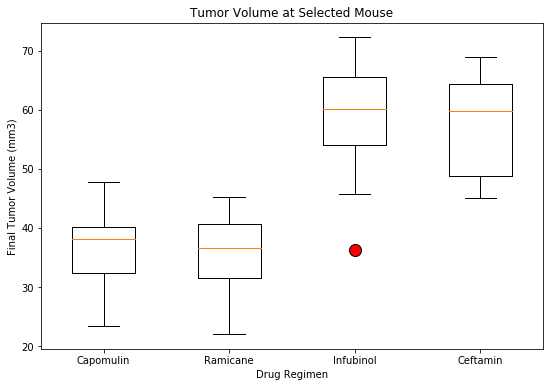

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


orange= dict(markerfacecolor='red',markersize=12)

#data_plot=data_plot.values
fig1, ax1 = plt.subplots(figsize=(9,6))

#setting the labels and title
ax1.set_title("Tumor Volume at Selected Mouse")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data_plot, labels = regimen, widths =0.5, vert=True, flierprops= orange )


#display the figure
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
